In [2]:
# Install needed packages (run in Colab once)
!pip install -q mlxtend


In [4]:
import pandas as pd

In [5]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [9]:
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [13]:
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")


In [15]:
import pandas as pd
from google.colab import files



In [17]:
print("👉 Click 'Choose files' below and select your 'supermarket_sales - Sheet1.csv'")
uploaded = files.upload()

👉 Click 'Choose files' below and select your 'supermarket_sales - Sheet1.csv'


Saving archive.zip to archive (1).zip


In [20]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)


In [21]:
use_synth = False   # set True to run demo data if you don't have a CSV

if not use_synth:
    from google.colab import files
    print("Upload your supermarket CSV (e.g. supermarket_sales.csv)")
    uploaded = files.upload()
    if len(uploaded) == 0:
        raise SystemExit("No file uploaded. Re-run cell or set use_synth=True.")
    fname = list(uploaded.keys())[0]
    df = pd.read_csv(fname)
else:
    # small demo dataset (so everything runs instantly)
    np.random.seed(1)
    n = 2000
    df = pd.DataFrame({
        'Invoice ID': [f'INV{1000+i}' for i in range(n)],
        'Branch': np.random.choice(['A','B','C'], n),
        'Product line': np.random.choice(['Food','Beauty','Electronics','Home'], n),
        'Unit price': np.round(np.random.uniform(10,200,size=n),2),
        'Quantity': np.random.randint(1,6,size=n),
        'Payment': np.random.choice(['Cash','Card','Ewallet'], n),
        'Date': pd.to_datetime('2023-01-01') + pd.to_timedelta(np.random.randint(0,365,size=n), unit='d')
    })
    df['Tax'] = (df['Unit price'] * df['Quantity']) * 0.05
    df['Total'] = df['Unit price'] * df['Quantity'] + df['Tax']
    df['Rating'] = np.round(np.random.normal(7,1.0,size=n).clip(4,10),1)

print("Loaded rows:", df.shape[0])
df.head()


Upload your supermarket CSV (e.g. supermarket_sales.csv)


Saving archive.zip to archive (2).zip
Loaded rows: 1000


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [22]:
print("Shape:", df.shape)
display(df.head())
print("\nColumns:", list(df.columns))
print("\nMissing values per column:\n", df.isnull().sum())


Shape: (1000, 17)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3



Columns: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

Missing values per column:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [23]:
df = df.copy()
df.drop_duplicates(inplace=True)

# date features (if Date exists)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    df['Weekday'] = df['Date'].dt.day_name()
    df['IsWeekend'] = df['Weekday'].isin(['Saturday','Sunday']).astype(int)

# ensure Total is present
if 'Total' not in df.columns and 'Unit price' in df.columns and 'Quantity' in df.columns:
    df['Total'] = df['Unit price'] * df['Quantity'] + df.get('Tax', 0)

# Create easy binary target: HighValue = 1 if total > 75th percentile
df['HighValue'] = (df['Total'] > df['Total'].quantile(0.75)).astype(int)

# fill simple missing values
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object','category']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
for c in cat_cols:
    if df[c].isnull().any():
        df[c] = df[c].fillna(df[c].mode().iloc[0])

print("After cleaning shape:", df.shape)
df[['Total','HighValue']].head()


After cleaning shape: (1000, 22)


,Total,HighValue
0,522.83,1
1,76.40,0
2,324.31,0
3,465.76,1
4,604.17,1


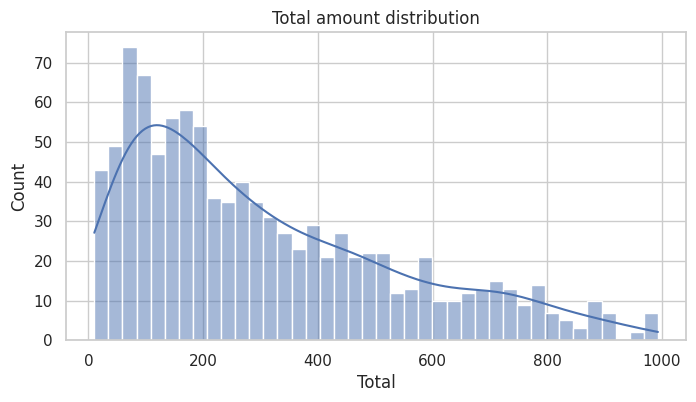

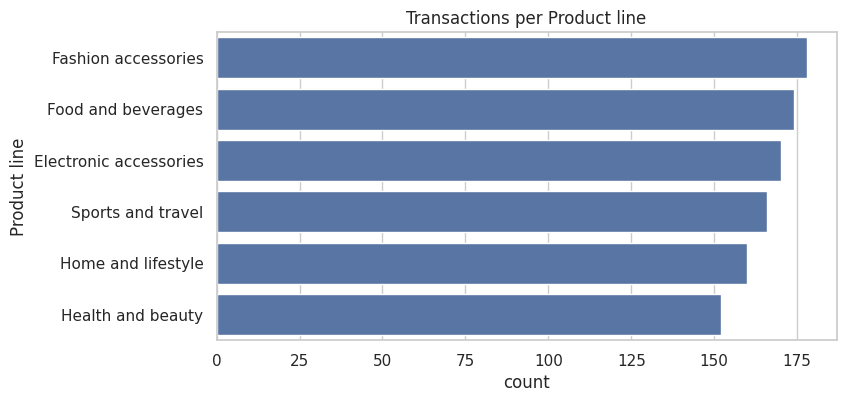

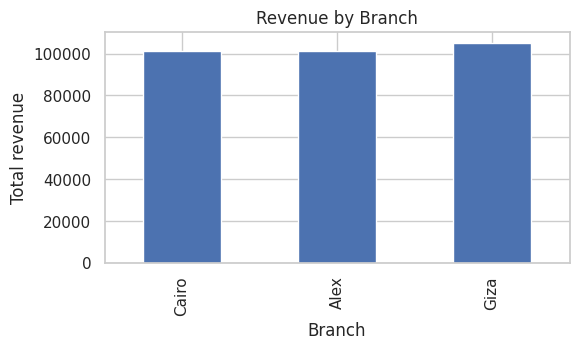

In [24]:
plt.figure(figsize=(8,4))
sns.histplot(df['Total'], bins=40, kde=True)
plt.title('Total amount distribution'); plt.show()

if 'Product line' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(y='Product line', data=df, order=df['Product line'].value_counts().index)
    plt.title('Transactions per Product line'); plt.show()

if 'Branch' in df.columns:
    rev = df.groupby('Branch')['Total'].sum().sort_values()
    rev.plot(kind='bar', title='Revenue by Branch', figsize=(6,3)); plt.ylabel('Total revenue'); plt.show()


In [26]:
# remove ID columns and Date (they are not features)
drop_cols = [c for c in ['Invoice ID','Date','Time'] if c in df.columns]
df_ml = df.drop(columns=drop_cols).copy()

# one-hot encode text columns (simple and safe)
cat_cols = df_ml.select_dtypes(include=['object','category']).columns.tolist()
if 'HighValue' in cat_cols: cat_cols.remove('HighValue')
df_enc = pd.get_dummies(df_ml, columns=cat_cols, drop_first=True)

# X, y and split
X = df_enc.drop(columns=['HighValue'])
y = df_enc['HighValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (800, 30) Test shape: (200, 30)


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        50

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion matrix:
 [[150   0]
 [  0  50]]


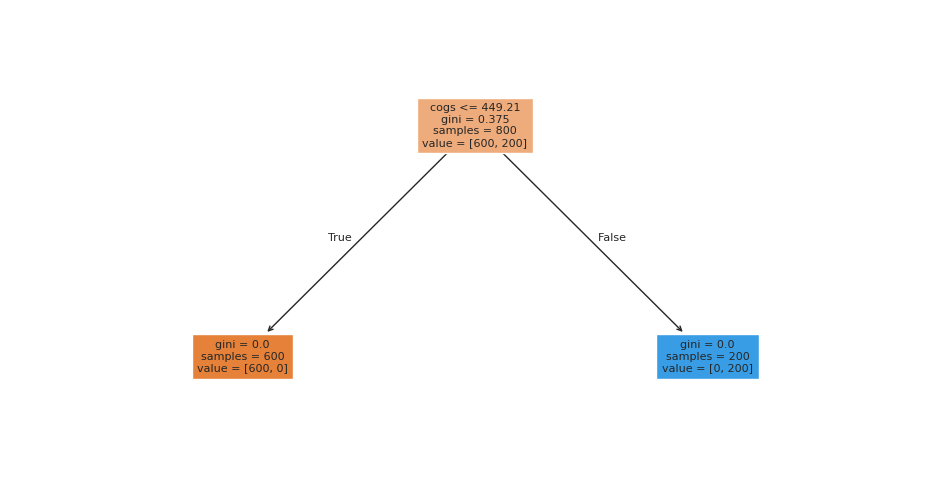

In [27]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)  # shallow tree is easy to read
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# small visual (only first few levels)
plt.figure(figsize=(12,6))
plot_tree(dt, filled=True, feature_names=X.columns, max_depth=2, fontsize=8)
plt.show()


In [28]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)

print("Naive Bayes report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       150
           1       0.94      1.00      0.97        50

    accuracy                           0.98       200
   macro avg       0.97      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200

Confusion matrix:
 [[147   3]
 [  0  50]]


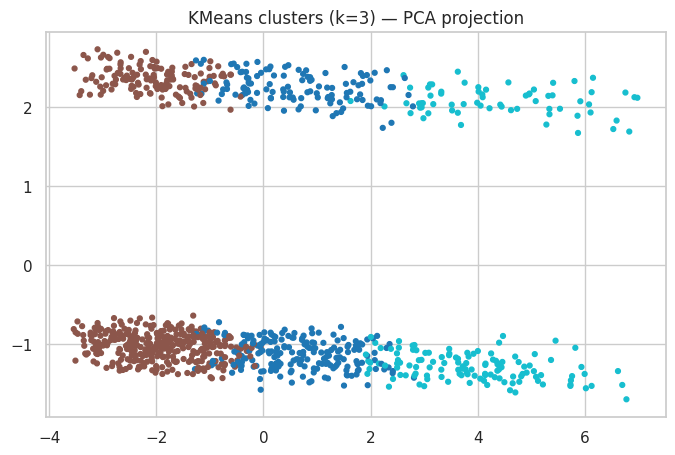

Silhouette (how good clusters are): 0.071


In [29]:
# scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   # X is already numeric after one-hot

# reduce to 2D for plotting
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=12, cmap='tab10')
plt.title(f'KMeans clusters (k={k}) — PCA projection')
plt.show()

print("Silhouette (how good clusters are):", round(silhouette_score(X_scaled, labels), 3))


In [31]:
# Check for transaction & product columns (change names if your CSV uses other names)
possible_invoice = [c for c in ['Invoice ID','InvoiceId','Invoice','Invoice_No','InvoiceNo'] if c in df.columns]
possible_product = [c for c in ['Product line','Product','Item'] if c in df.columns]

if len(possible_invoice)==0 or len(possible_product)==0:
    print("Cannot find invoice/product columns for apriori. Columns found:", list(df.columns))
else:
    invoice_col = possible_invoice[0]
    product_col = possible_product[0]
    # create basket: rows = invoice, columns = product, value = 1 if product bought in that invoice
    basket = df.groupby([invoice_col, product_col])['Quantity'].sum().unstack().fillna(0)
    basket_sets = basket.applymap(lambda x: 1 if x>0 else 0)

    freq_items = apriori(basket_sets, min_support=0.01, use_colnames=True)
    rules = association_rules(freq_items, metric="confidence", min_threshold=0.3)
    print("Top association rules:\n", rules[['antecedents','consequents','support','confidence','lift']].head())


Top association rules:
 Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


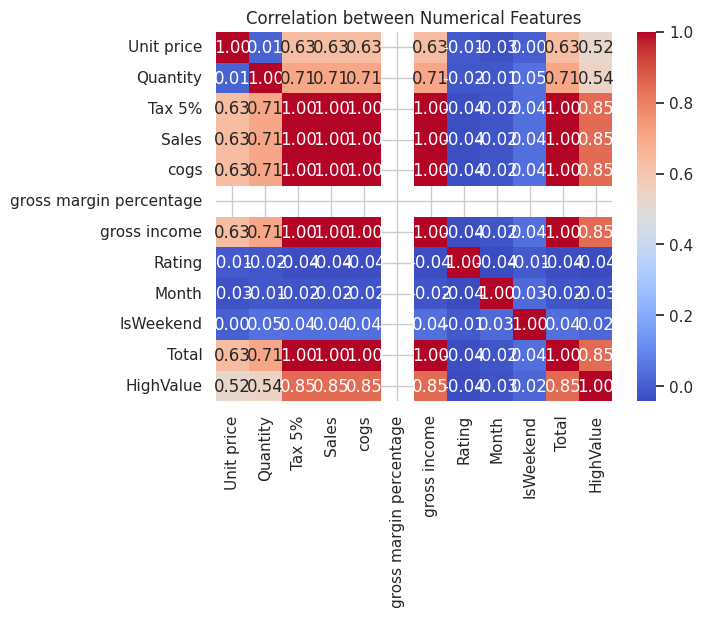

In [32]:
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Numerical Features")
plt.show()


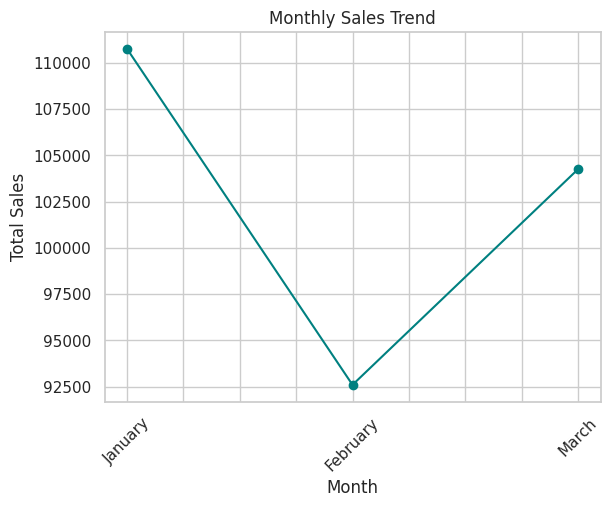

In [33]:
# Ensure date is parsed properly
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()

monthly = df.groupby('Month')['Total'].sum().reindex([
    'January','February','March','April','May','June','July',
    'August','September','October','November','December'
])

monthly.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


In [34]:
!pip install -q mlxtend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (8,5)


In [35]:
print("Data shape:", df.shape)
print("\nColumn names:", list(df.columns))
print("\nMissing values:")
print(df.isnull().sum())

df.describe().T


Data shape: (1000, 22)

Column names: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Month', 'Weekday', 'IsWeekend', 'Total', 'HighValue']

Missing values:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Month                      0
Weekday                    0
IsWeekend                  0
Total                      0
HighValue                  0
dtype: int64


,count,mean,min,25%,50%,75%,max,std
Unit price,1000.0,55.67213,10.08,32.875,55.23,77.935,99.96,26.494628
Quantity,1000.0,5.51,1.0,3.0,5.0,8.0,10.0,2.923431
Tax 5%,1000.0,15.379369,0.5085,5.924875,12.088,22.44525,49.65,11.708825
Sales,1000.0,322.966749,10.6785,124.422375,253.848,471.35025,1042.65,245.885335
Date,1000,2019-02-14 00:05:45.600000,2019-01-01 00:00:00,2019-01-24 00:00:00,2019-02-13 00:00:00,2019-03-08 00:00:00,2019-03-30 00:00:00,NaN
cogs,1000.0,307.58738,10.17,118.4975,241.76,448.905,993.0,234.17651
gross margin percentage,1000.0,4.761905,4.761905,4.761905,4.761905,4.761905,4.761905,0.0
gross income,1000.0,15.379369,0.5085,5.924875,12.088,22.44525,49.65,11.708825
Rating,1000.0,6.9727,4.0,5.5,7.0,8.5,10.0,1.71858
IsWeekend,1000.0,0.297,0.0,0.0,0.0,1.0,1.0,0.457165


In [36]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)


In [37]:
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Value','High Value'])
disp.plot(cmap='Blues')
plt.title("Naïve Bayes Confusion Matrix")
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       150
           1       0.94      1.00      0.97        50

    accuracy                           0.98       200
   macro avg       0.97      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



NameError: name 'ConfusionMatrixDisplay' is not defined

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       150
           1       0.94      1.00      0.97        50

    accuracy                           0.98       200
   macro avg       0.97      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



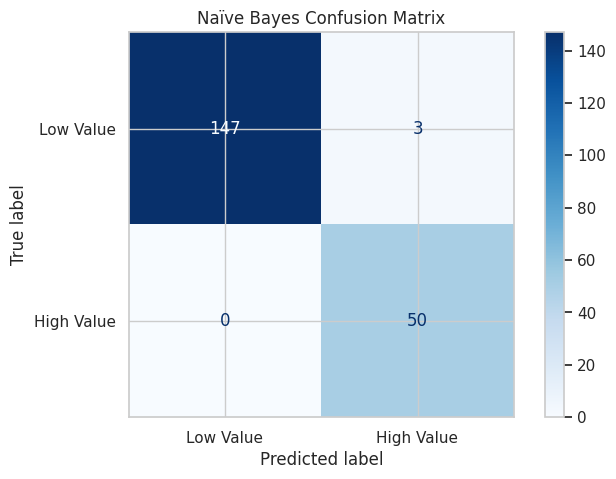

In [39]:
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Value','High Value'])
disp.plot(cmap='Blues')
plt.title("Naïve Bayes Confusion Matrix")
plt.show()
